In [1]:
##### setting
### set filename you want to analysis
filepath = None

if filepath == None:
    import os
    import smooziee
    filepath = os.path.join(os.path.dirname(smooziee.__file__), 'data', 'PbTe_sq_GX711_p0p25_RT_4')
    
filename = os.path.basename(filepath)


In [2]:
##### import
# from smooziee.smooziee.fitting import Fitting
# from smooziee.smooziee.peak_search import PeakSearch
from smooziee.smooziee import fitting
from smooziee.smooziee import peak_search
import imp
imp.reload(fitting)
imp.reload(peak_search)
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import lmfit


In [5]:
import pickle
with open('pksearch.pickle', 'rb') as f:
    processor = pickle.load(f) 

print(processor.x.shape)
print(processor.y.shape)
print(processor.ix_peaks)
print(processor.ix_peak_pairs)

(73,)
(73,)
[7, 15, 21, 28, 36, 47, 55]
[[7, 36], [15, 28]]


In [6]:
class PeakSearch():
    def __init__(self, x, ix_peaks, ix_peakpairs):
        self.x = x
        self.ix_peaks = ix_peaks
        self.ix_peakpairs = ix_peakpairs

peaksearch = PeakSearch(processor.x,
                        processor.ix_peaks,
                        processor.ix_peak_pairs)

fit = fitting.Fitting(peaksearch,
                      ['lorentzian' for i in range(len(processor.ix_peaks))])


In [7]:
fit.set_params_expr(param_names=['sigma', 'amplitude'])

In [8]:
fit.params.pretty_print()

Name             Value      Min      Max   Stderr     Vary     Expr Brute_Step
l0_amplitude         1     -inf      inf     None     True     None     None
l0_center           -7     -inf      inf     None     True     None     None
l0_fwhm              2     -inf      inf     None    False 2.0000000*l0_sigma     None
l0_height       0.3183     -inf      inf     None    False 0.3183099*l0_amplitude/max(1.e-15, l0_sigma)     None
l0_sigma             1        0      inf     None     True     None     None
l1_amplitude         1     -inf      inf     None     True     None     None
l1_center           -3     -inf      inf     None     True     None     None
l1_fwhm              2     -inf      inf     None    False 2.0000000*l1_sigma     None
l1_height       0.3183     -inf      inf     None    False 0.3183099*l1_amplitude/max(1.e-15, l1_sigma)     None
l1_sigma             1        0      inf     None     True     None     None
l2_amplitude         1     -inf      inf     None     True 

In [9]:
fit.set_params_vary([0, 6], ['sigma'], vary=False)

In [10]:
fit.params.pretty_print()

Name             Value      Min      Max   Stderr     Vary     Expr Brute_Step
l0_amplitude         1     -inf      inf     None     True     None     None
l0_center           -7     -inf      inf     None     True     None     None
l0_fwhm              2     -inf      inf     None    False 2.0000000*l0_sigma     None
l0_height       0.3183     -inf      inf     None    False 0.3183099*l0_amplitude/max(1.e-15, l0_sigma)     None
l0_sigma             1        0      inf     None    False     None     None
l1_amplitude         1     -inf      inf     None     True     None     None
l1_center           -3     -inf      inf     None     True     None     None
l1_fwhm              2     -inf      inf     None    False 2.0000000*l1_sigma     None
l1_height       0.3183     -inf      inf     None    False 0.3183099*l1_amplitude/max(1.e-15, l1_sigma)     None
l1_sigma             1        0      inf     None     True     None     None
l2_amplitude         1     -inf      inf     None     True 

In [11]:
fit.fit(processor.x, processor.y)

In [12]:
fit.result.params.pretty_print()

Name             Value      Min      Max   Stderr     Vary     Expr Brute_Step
l0_amplitude     2.162     -inf      inf   0.1093     True     None     None
l0_center       -7.392     -inf      inf  0.05764     True     None     None
l0_fwhm              2     -inf      inf        0    False 2.0000000*l0_sigma     None
l0_height       0.6882     -inf      inf  0.03481    False 0.3183099*l0_amplitude/max(1.e-15, l0_sigma)     None
l0_sigma             1        0      inf        0    False     None     None
l1_amplitude      3.78     -inf      inf   0.3499     True     None     None
l1_center       -2.424     -inf      inf   0.2684     True     None     None
l1_fwhm          6.166     -inf      inf   0.8359    False 2.0000000*l1_sigma     None
l1_height       0.3902     -inf      inf  0.02381    False 0.3183099*l1_amplitude/max(1.e-15, l1_sigma)     None
l1_sigma         3.083        0      inf    0.418     True     None     None
l2_amplitude     2.575     -inf      inf 2.055e+04     True

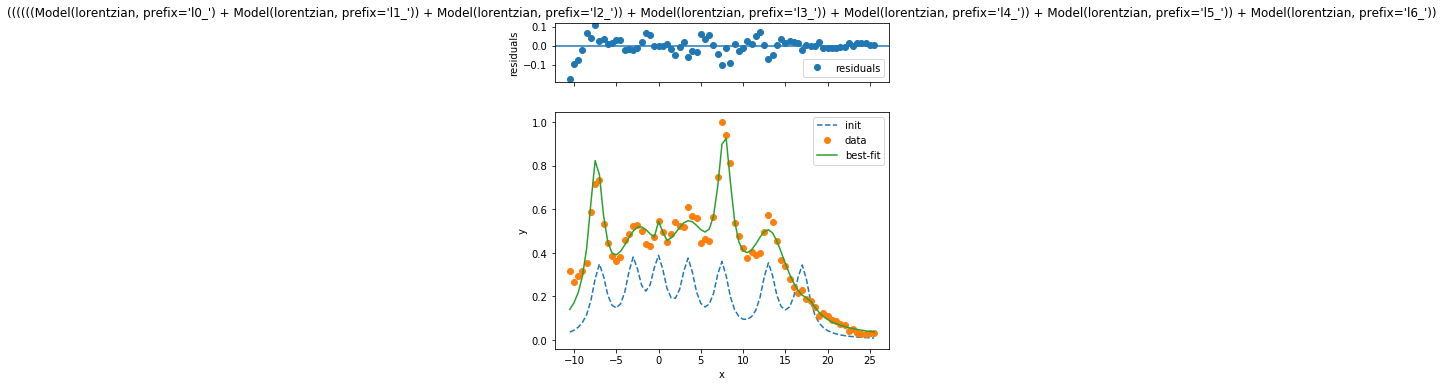

In [13]:
fit.plot(show_init=True)

In [ ]:
fit.plot_evalcomponents()

In [ ]:
fit.result.eval_components()

In [ ]:
fit.result.userkws['x']